In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Data.csv")
df

,Models,Accuracy,F1 Score,Precision,Recall,AUC-ROC,Log Loss,Perplexity
0,BERT,0.92,0.91,0.90,0.93,0.95,0.25,12
1,XLNet,0.89,0.88,0.87,0.90,0.92,0.30,14
2,RoBERTa,0.91,0.90,0.89,0.92,0.94,0.28,13
3,ALBERT,0.88,0.86,0.85,0.89,0.91,0.32,16
4,DistilBERT,0.87,0.85,0.84,0.88,0.90,0.35,17


In [22]:
criteria = {'Accuracy': '+', 'F1 Score': '+', 'Precision': '+', 'Recall': '+', 'AUC-ROC': '+', 'Log Loss':'-', 'Perplexity': '-'}

# Assign weights (higher weight for Accuracy & F1 Score)
weights = {'Accuracy': 0.25, 'F1 Score': 0.25, 'Precision': 0.1, 'Recall': 0.1, 'AUC-ROC': 0.1, 'Log Loss':0.1, 'Perplexity': 0.1}



In [23]:
# Normalize the data with weights
normalized_df = df.copy()
for col in criteria:
    if criteria[col] == '+':
        normalized_df[col] = (df[col] / np.sqrt((df[col]**2).sum())) * weights[col]
    else:
        normalized_df[col] = (1 - (df[col] / np.sqrt((df[col]**2).sum()))) * weights[col]

In [24]:
ideal_best = normalized_df.iloc[:, 1:].max().values
ideal_worst = normalized_df.iloc[:, 1:].min().values

distance_best = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_worst) ** 2).sum(axis=1))

In [25]:
topsis_score = distance_worst / (distance_best + distance_worst)

df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

df.to_csv("topsis_results.csv", index=False)

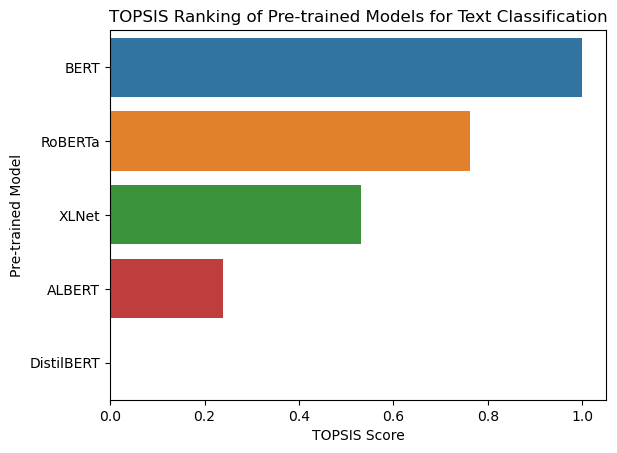

TOPSIS ranking completed and results saved.


In [26]:
sns.barplot(x=df['TOPSIS Score'], y=df['Models'], order=df.sort_values('TOPSIS Score', ascending=False)['Models'])
plt.xlabel("TOPSIS Score")
plt.ylabel("Pre-trained Model")
plt.title("TOPSIS Ranking of Pre-trained Models for Text Classification")
plt.savefig("topsis_ranking.png")
plt.show()

print("TOPSIS ranking completed and results saved.")